9.2 Exercise 9.30 in textbook

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [115]:
n = 100
m = 200
np.random.seed(364)
A = np.random.randn(m,n)

$\nabla^2f(x) = \sum_m \frac{a_ia_i^T}{(1-a_i^Tx)^2}+\text{diag}(\frac{1}{(1-x^2)}+\frac{1}{1+x^2})=A^T\text{diag}((1-a_i^Tx)^2)A+\text{diag}(\frac{1}{(1-x^2)}+\frac{1}{1+x^2})$

In [110]:
f = lambda x : - np.sum(np.log(1 - A @ x)) - np.sum(np.log(1 - x ** 2))
gradient = lambda x : A.T @ (1 / (1 - A @ x)) + 1 / (1 - x) - 1 / (1 + x)
hessian = lambda x : A.T @ np.diag(1 / (1 - A @ x) ** 2) @ A + np.diag(1 / (1 - x) ** 2 + 1 / (1 + x) ** 2)
newton_dec_sq = lambda x : gradient(x) @ np.linalg.solve(hessian(x), gradient(x)) # \lambda^2, square of the Newton decrement
def backtrack(f, x, direction, alpha=0.01, beta=0.5): # \alpha \in (0,0.5), \beta \in (0,1)
    t = 1
    # find a step length for which the tentative point is in the domain of f
    while np.any(np.abs(x + t * direction) > 1) or np.any(A @ (x + t * direction) > 1):
        t *= beta
    while f(x + t * direction) > f(x) + alpha * t * gradient(x) @ direction:
        t *= beta
    return t

-154.91755529103912


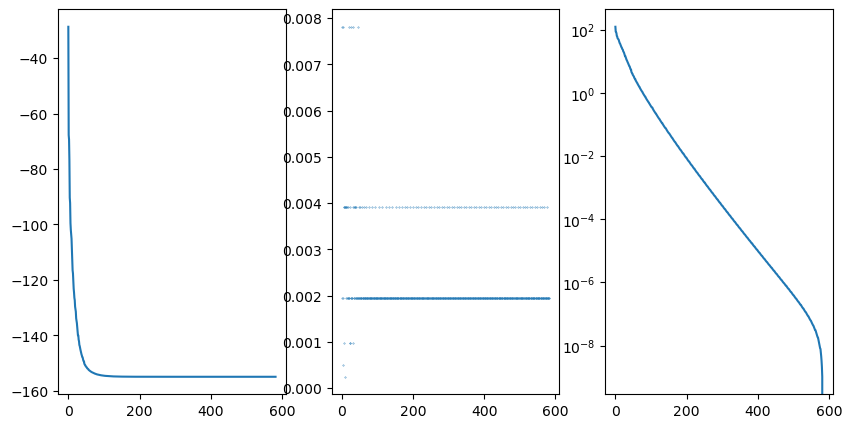

In [116]:
# gradient descent method
x = np.zeros(n)
eta = 1e-3
objective = []
steps = []
while np.linalg.norm(gradient(x), 2) > eta:
    t = backtrack(f, x, direction=-gradient(x))
    x += t * -gradient(x)
    objective.append(f(x))
    steps.append(t)
optimum = f(x)
print(optimum)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].plot(objective)
axs[1].scatter(range(len(steps)), steps, s=0.08)
axs[2].semilogy(np.array(objective) - optimum)
plt.show()

-154.916968785867


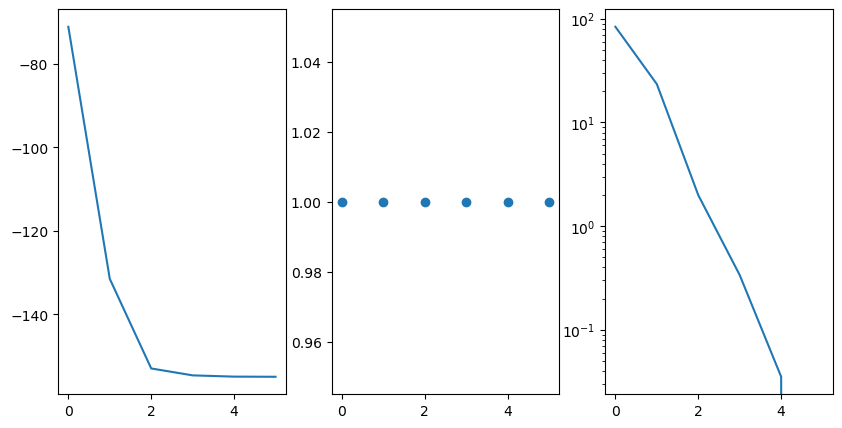

In [117]:
# Netwon's method
x = np.zeros(n)
epsilon = 1e-3
objective = []
steps = []
while newton_dec_sq(x) / 2 > epsilon:
    direction = - np.linalg.solve(hessian(x), gradient(x))
    t = backtrack(f, x, direction)
    x += t * direction
    objective.append(f(x))
    steps.append(t)
optimum = f(x)
print(optimum)
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].plot(objective)
axs[1].scatter(range(len(steps)), steps)
axs[2].semilogy(np.array(objective) - optimum)
plt.show()